In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from itertools import combinations

# IRIS multi-classifcation

## 1. Dataset Exploration and Preparation

In [132]:
# Select the Iris dafrom scikit-learn for classification. Load the datase using sklearn.datasets.load * functions

iris = load_iris()

In [134]:
# Display the dataset’s feature names, target names, and a sample from the dataset. 

print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


In [136]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [138]:
# Question: Is the dataset well-balanced across the class labels? Comment on the distribution of target labels

In [140]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [142]:
# There are 3 classes (0,1,2) and each of them are distributed equally
# The dataset is perfectly balanced with 50 samples per class

## 2. Data Preprocessing

In [192]:
# Split the dataset into training and testing datasets (80/20 split) using train test split

X = df.drop(columns=['target'])  
y = df['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (120, 4) (120,)
Testing set shape: (30, 4) (30,)


In [194]:
# Normalize the feature values using StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [196]:
X_train_scaled

array([[-1.30657227,  0.29990864, -1.29299224, -1.22930526],
       [-0.93938569,  0.96228354, -1.29299224, -1.10080645],
       [ 1.26373384, -0.14167463,  1.04524991,  1.21217209],
       [ 0.89654725, -0.14167463,  1.04524991,  0.82667566],
       [ 1.01894278, -0.14167463,  0.43285316,  0.31268043],
       [ 0.28456961, -1.90800772,  0.76688775,  0.44117924],
       [-0.93938569,  1.18307518, -1.2373198 , -1.22930526],
       [ 0.65175619, -1.68721608,  0.43285316,  0.18418162],
       [ 1.14133831, -0.14167463,  0.76688775,  0.69817686],
       [-1.06178122, -1.24563281,  0.48852559,  0.69817686],
       [ 1.63092043, -0.14167463,  1.26793964,  1.21217209],
       [ 1.75331596,  1.18307518,  1.37928451,  1.72616732],
       [ 0.65175619, -1.24563281,  0.71121532,  0.44117924],
       [ 0.52936066, -0.36246627,  0.37718073,  0.18418162],
       [ 0.28456961, -0.80404954,  0.82256018,  0.56967805],
       [-0.20501251, -1.24563281,  0.154491  , -0.07281599],
       [ 0.28456961, -0.

In [198]:
X_test_scaled

array([[ 0.89654725, -0.5832579 ,  0.54419802,  0.44117924],
       [ 0.40696513, -0.5832579 ,  0.21016343,  0.18418162],
       [ 2.3652936 ,  1.62465845,  1.7133191 ,  1.3406709 ],
       [-1.18417675,  0.079117  , -1.12597494, -1.22930526],
       [ 1.01894278, -0.36246627,  0.54419802,  0.18418162],
       [-0.32740804, -1.46642445,  0.04314613, -0.2013148 ],
       [-0.44980357,  1.40386682, -1.18164737, -1.22930526],
       [-0.20501251, -0.36246627, -0.0125263 ,  0.18418162],
       [ 0.77415172,  0.29990864,  0.48852559,  0.44117924],
       [-0.69459463,  0.74149191, -1.2373198 , -1.22930526],
       [ 2.61008466,  1.62465845,  1.5463018 ,  1.08367328],
       [ 1.38612937,  0.079117  ,  0.98957748,  1.21217209],
       [ 0.16217408,  0.29990864,  0.65554289,  0.82667566],
       [ 1.14133831,  0.079117  ,  1.10092235,  1.59766851],
       [-0.32740804, -1.46642445,  0.09881857, -0.07281599],
       [ 1.14133831,  0.52070027,  1.15659478,  1.21217209],
       [ 2.3652936 , -0.

In [200]:
# Explain the importance of feature scaling in KNN

# KNN uses distance based calculations (Euclidean distance). 
# Without scaling, features with larger ranges will dominate the distance metric.
# Standardizing makes the features unitless and
# Ensures that all features contribute equally as the values are scaled (mostly from -3 to 3)

## 3. Implementing K-Nearest Neighbors

In [203]:
# Use scikit-learn’s KNeighborsClassifier to train the KNN model
# Train the model using the default parameters (n neighbors=5, metric=’minkowski’, p=2 for Euclidean distance)

knn = KNeighborsClassifier(n_neighbors=5)

In [204]:
# Fit the model on the training dataset and test the performance in terms of F1 score, precision and recall on the test set

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [207]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy", round(accuracy, 3))
print("precision", round(precision, 3))
print("recall", round(recall, 3))
print("f1", round(f1, 3))

Accuracy 0.933
precision 0.945
recall 0.933
f1 0.934


In [209]:
# Evaluate the impact of different values of k (n neighbors)
# Train the model for different values of k ranging from 1 to 20

k_values = range(1, 21)

accuracies = []
precisions = []
recalls = []
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)

    accuracies.append(accuracy_score(y_test, y_pred_k))
    precisions.append(precision_score(y_test, y_pred_k, average='weighted'))
    recalls.append(recall_score(y_test, y_pred_k, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred_k, average='weighted'))



In [211]:
print(accuracies)
print(precisions)

[0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
[0.9454545454545454, 0.9700000000000001, 0.9700000000000001, 0.9700000000000001, 0.9454545454545454, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9700000000000001, 0.9700000000000001, 0.9700000000000001, 0.9700000000000001, 0.9700000000000001, 0.9700000000000001, 0.9700000000000001, 0.9700000000000001]


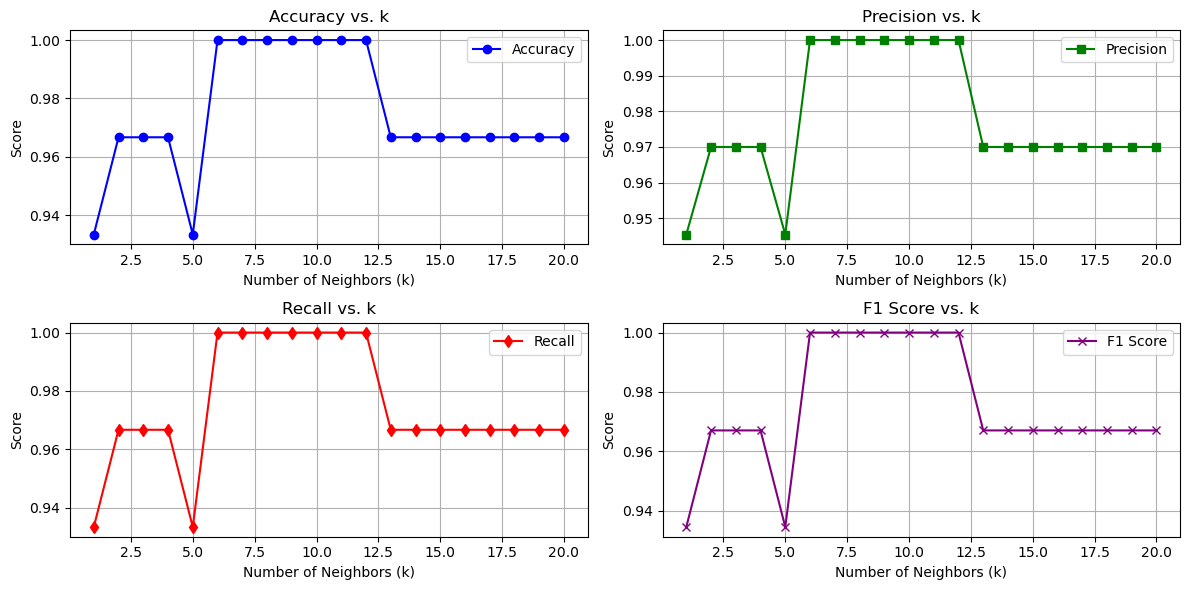

In [213]:
# Create a line plot of k vs. accuracy (for classification)
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("Accuracy vs. k")
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(k_values, precisions, marker='s', linestyle='-', color='g', label="Precision")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("Precision vs. k")
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(k_values, recalls, marker='d', linestyle='-', color='r', label="Recall")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("Recall vs. k")
plt.grid()
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(k_values, f1_scores, marker='x', linestyle='-', color='purple', label="F1 Score")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("F1 Score vs. k")
plt.grid()
plt.legend()

# Show all plots
plt.tight_layout()
plt.show()

In [215]:
# Find the optimal value of k.

# The best k is where accuracy is highest 
# We are obtaining highest accuracy with k = 7

In [217]:
# Question: What value of k gives the best performance? Explain why the choice of k affects the model’s performance

# According to theory k ranges around = sqrt(N) (where N is number of observations)
# Choosing too Small k or large L affects model performance in following ways:

# Too Small K leads to High variance (overfitting) (We assign label to test data as same as its single closest training point. 
# This makes the model highly sensitive to noise in the data. Even slighest variation in data changes the predictions)

# Too Large K leads to  High bias (underfitting) (the model assigns the most common label in the dataset to all points.
# This causes the model to ignore local patterns in the data)

## 4. Model Evaluation

In [220]:
# Generate a confusion matrix and a classification report (using classification report) for y test predictions.

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 5,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

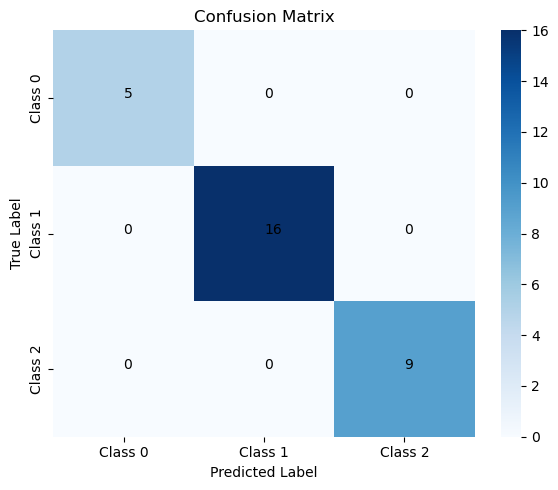

In [222]:
classes = ['Class 0', 'Class 1', 'Class 2']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, 
            cmap='Blues',
            xticklabels=classes, 
            yticklabels=classes)

for i in range(3):
    for j in range(3):
        plt.text(j + 0.5, i + 0.5, str(cm[i, j]))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [224]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [226]:
# Interpret the confusion matrix and explain the precision, recall, and F1-score for each target class.

# Confusion Matrix Helps interpret classification performance
# Diagonal elements = correctly classified samples per class.
# Off-diagonal elements = misclassified samples

# Precision: Out of all predictions for a class, how many were correct
# Precision=  (True Positives + False Positives) / (True Positives)
# Recall (Sensitivity): How many actual samples of a class were correctly predicted?
# Recall = (True Positives) / (True Positives + False Negatives)
# F1 Score: Balance between Precision & Recall
# F1 = 2 * (Precision + Recall) / (Precision * Recall)

In [228]:
# Tune the KNN model’s hyperparameters.
# Perform grid search or random search (GridSearchCV
# Number of neighbors (n neighbors).
# Distance metrics (metric, e.g., Euclidean, Manhattan).
# Weighting schemes (weights, e.g., uniform, distance).

param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Evaluate on test data
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))



Best Parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
Best Accuracy Score: 0.9666666666666668

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



In [230]:
# Question: How does choosing different distance metrics (e.g., Euclidean vs. Manhattan) affect model performance?

# If features are normalized (StandardScaler), Euclidean distance usually performs better.
# If features are sparse or have high variation, Manhattan distance may be more robust.

## 5. Comparison with Other Algorithms

In [233]:
# Compare KNN’s performance with other models like:
# Multinomial Logistic Regression.
# Random Forest

knn = KNeighborsClassifier(n_neighbors=7)
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

knn.fit(X_train_scaled, y_train)
log_reg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

models = {'KNN': y_pred_knn, 'Logistic Regression': y_pred_log, 'Random Forest': y_pred_rf}
for model, y_pred in models.items():
    print("Model: ", model)
    print(classification_report(y_test, y_pred))
    print("Accuracy: ", round(accuracy_score(y_test, y_pred), 3))

Model:  KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy:  1.0
Model:  Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy:  0.967
Model:  Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.94  

In [235]:
# KNN seems to classify best compared with Multinomial logistic and Random forest

In [237]:
# Explore the impact of dropping certain features on the KNN model’s performance.

feature_names = iris.feature_names
knn = KNeighborsClassifier(n_neighbors=7)

results = {}

for i in range(1, 5): 
    for combo in combinations(range(4), i):  
        selected_features = [feature_names[j] for j in combo]
        
        X_train_sub = X_train[selected_features]
        X_test_sub = X_test[selected_features]
        X_train_scaled = scaler.fit_transform(X_train_sub)
        X_test_scaled = scaler.transform(X_test_sub)
        knn.fit(X_train_scaled, y_train)
        y_pred_sub = knn.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred_sub)
        
        results[tuple(selected_features)] = acc

for feat_set, acc in results.items():
    print("Features:", feat_set, "→ Accuracy:", round(acc, 4))

Features: ('sepal length (cm)',) → Accuracy: 0.7333
Features: ('sepal width (cm)',) → Accuracy: 0.3667
Features: ('petal length (cm)',) → Accuracy: 1.0
Features: ('petal width (cm)',) → Accuracy: 0.9667
Features: ('sepal length (cm)', 'sepal width (cm)') → Accuracy: 0.5667
Features: ('sepal length (cm)', 'petal length (cm)') → Accuracy: 0.9667
Features: ('sepal length (cm)', 'petal width (cm)') → Accuracy: 0.9667
Features: ('sepal width (cm)', 'petal length (cm)') → Accuracy: 0.9
Features: ('sepal width (cm)', 'petal width (cm)') → Accuracy: 0.9667
Features: ('petal length (cm)', 'petal width (cm)') → Accuracy: 0.9667
Features: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)') → Accuracy: 0.8333
Features: ('sepal length (cm)', 'sepal width (cm)', 'petal width (cm)') → Accuracy: 0.9667
Features: ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)') → Accuracy: 0.9667
Features: ('sepal width (cm)', 'petal length (cm)', 'petal width (cm)') → Accuracy: 0.9667
Features

In [239]:
# Dropping the features is impacting accuracies. So its better to consider all features

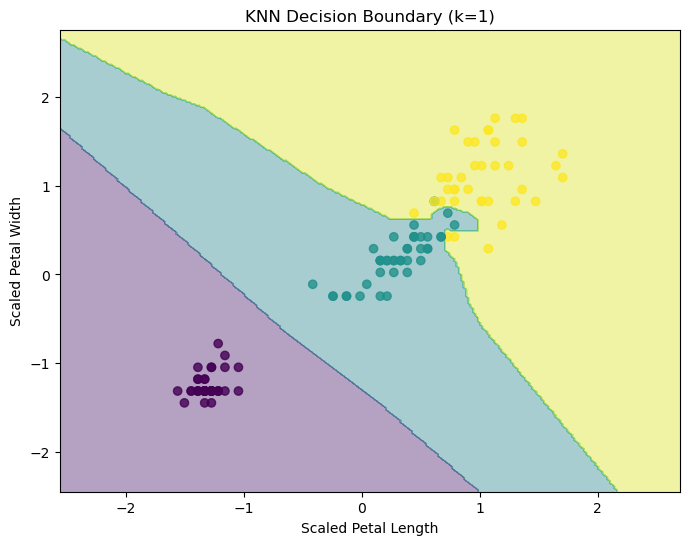

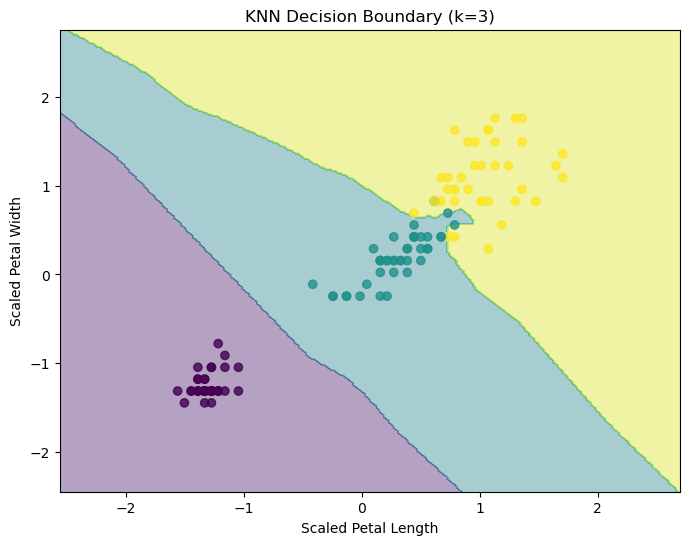

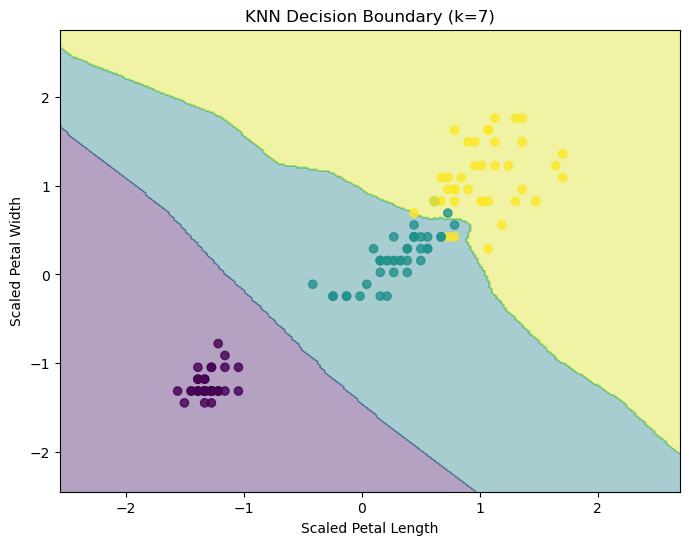

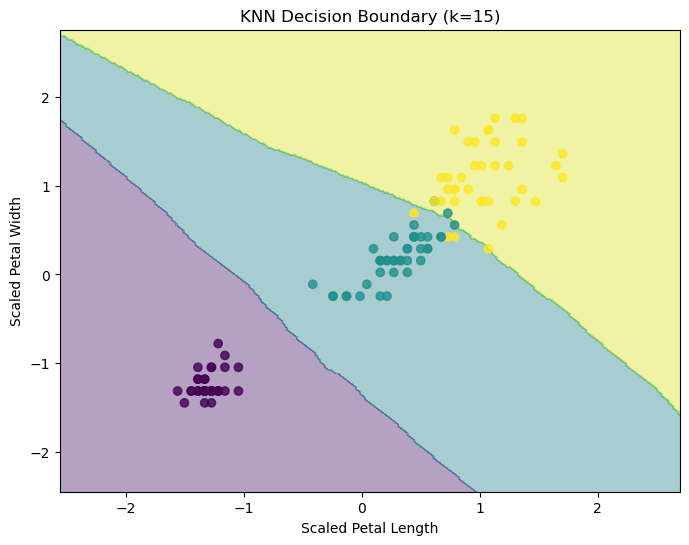

In [241]:
# Visualization: For 2D datasets (e.g., Iris), visualize decision boundaries using matplotlib for different values of k.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Using petal length and petal width
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to plot decision boundaries
def plot_decision_boundary(k):
    # Create classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Create mesh grid
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    # Predict for each point in mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, alpha=0.8)
    plt.xlabel('Scaled Petal Length')
    plt.ylabel('Scaled Petal Width')
    plt.title(f'KNN Decision Boundary (k={k})')
    plt.show()

# Plot decision boundaries for different k values
k_values = [1, 3, 7, 15]
for k in k_values:
    plot_decision_boundary(k)

In [42]:
# With PCA

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


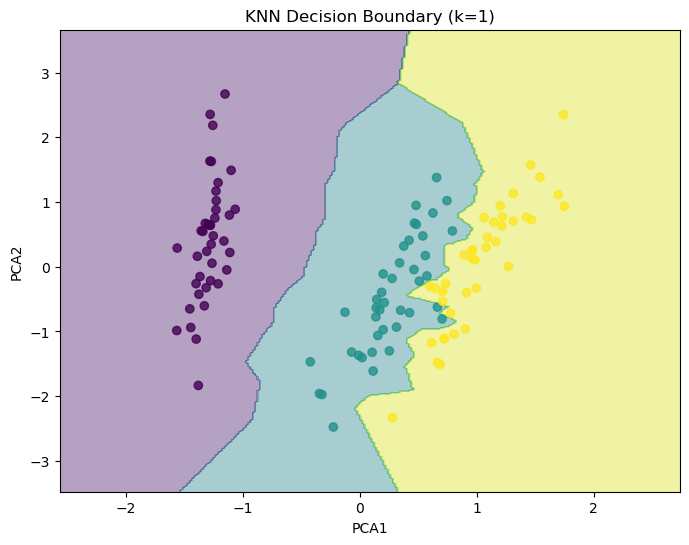

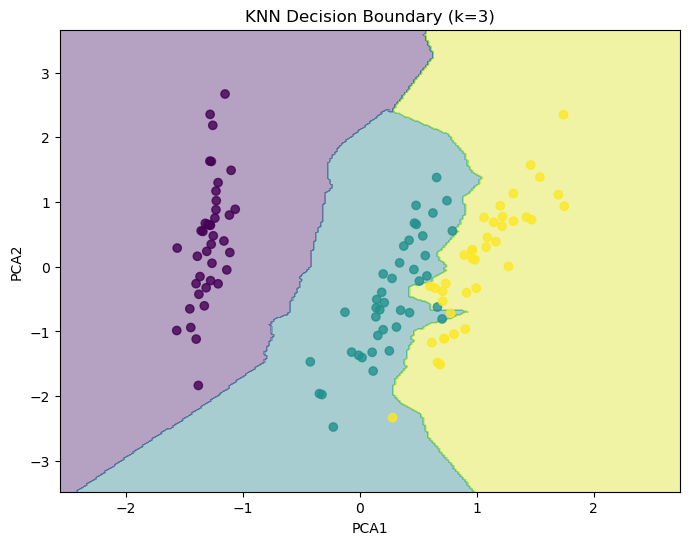

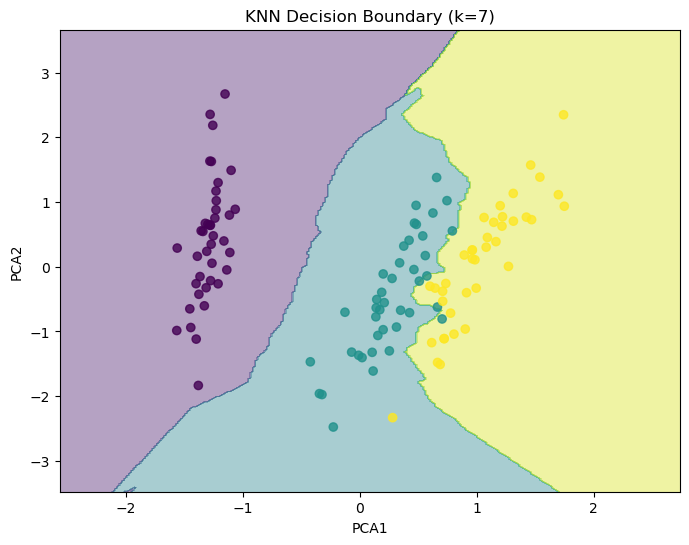

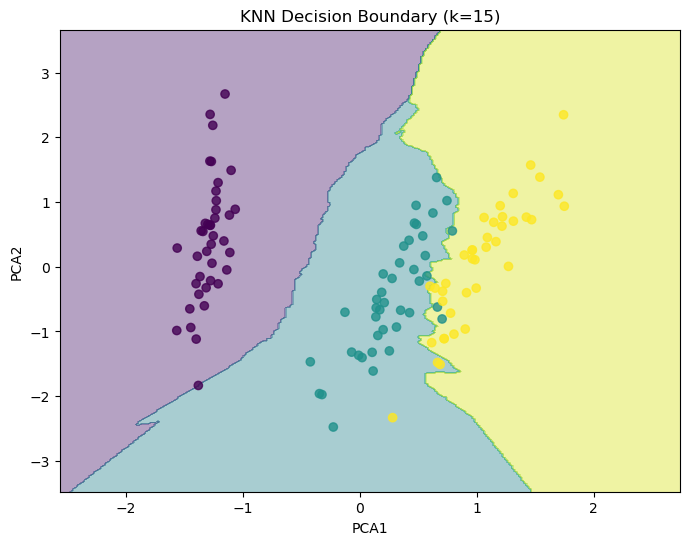

In [43]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to plot decision boundaries
def plot_decision_boundary(k):
    # Create classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Create mesh grid
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    # Predict for each point in mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, alpha=0.8)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title(f'KNN Decision Boundary (k={k})')
    plt.show()

# Plot decision boundaries for different k values
k_values = [1, 3, 7, 15]
for k in k_values:
    plot_decision_boundary(k)

In [44]:
# We should consider 2D visualization by doing PCA, instead of selecting features randomly

In [45]:
# Comment on how decision boundaries change as k increases.

# As k increases, we notice these changes in the decision boundaries:
# With k=1, the boundaries are very jagged and complex, potentially overfitting
# As k increases (3, 7), the boundaries become smoother and more generalized
# With large k (15), the boundaries become very smooth but might oversmooth, potentially underfitting
# The decision regions become larger and more stable with higher k values

# Implementing K-Means Clustering from Scratch (Iris Dataset)

## 1. Dataset Preparation

In [48]:
# Load the Iris dataset from sklearn.datasets
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Use only the numeric features (sepal length, sepal width, petal length, petal width)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

print(df.head())
print(df.shape)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
(150, 4)


In [49]:
# Normalize the features using a scaler (e.g., StandardScaler or MinMaxScaler)
scaler = StandardScaler()
X = scaler.fit_transform(df)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [50]:
X.shape

(150, 4)

## 2. K-Means Implementation

In [52]:
# Randomly initialize k centroids, choosing k data points randomly from the datase

def initialize_centroids(X, k):
    np.random.seed(42) 
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    
    return X[random_indices]

k = 3
centroids = initialize_centroids(X, k)
centroids

array([[ 3.10997534e-01, -5.92373012e-01,  5.35408562e-01,
         8.77547895e-04],
       [-1.73673948e-01,  1.70959465e+00, -1.16971425e+00,
        -1.18381211e+00],
       [ 2.24968346e+00, -1.05276654e+00,  1.78583195e+00,
         1.44883158e+00]])

In [53]:
# Assign each data point to the nearest cluster centroid by calculating the Euclidean distance.

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = euclidean_distance(point,centroids)
        # print(distances)
        cluster = np.argmin(distances) 
        # print(clusters)
        clusters.append(cluster)
    return np.array(clusters)

clusters = assign_clusters(X, centroids)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0])

In [54]:
# Update the cluster centroids to the mean of all points assigned to each cluster

def update_centroids(X, clusters, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[clusters == i]
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)  
    return new_centroids

new_centroids = update_centroids(X, clusters, k)
new_centroids

array([[ 0.2331039 , -0.56770907,  0.49142722,  0.48196184],
       [-1.00206653,  0.90625492, -1.30310821, -1.25634413],
       [ 1.73650189,  0.19300419,  1.32778916,  1.23976869]])

In [55]:
# Repeat these steps until: The cluster assignments do not change. A maximum number of iterations (e.g., 100) is reached
max_iters = 1000
for i in range(max_iters):
    old_centroids = centroids.copy()
    clusters = assign_clusters(X, centroids)
    centroids = update_centroids(X, clusters, k)

    if np.linalg.norm(centroids - old_centroids) < 0.001:
        print("Converged at iteration: ", i)
        break

print("New Centroids after convergence \n")
print(new_centroids)
print("Clusters \n")
print(clusters)


Converged at iteration:  6
New Centroids after convergence 

[[ 0.2331039  -0.56770907  0.49142722  0.48196184]
 [-1.00206653  0.90625492 -1.30310821 -1.25634413]
 [ 1.73650189  0.19300419  1.32778916  1.23976869]]
Clusters 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [56]:
# Implement the algorithm in Python, structuring it with reusable helper functions:
# A function to calculate distances between points and centroids.
# A function to assign clusters
# A function to update centroids

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        old_centroids = centroids.copy()
        clusters = assign_clusters(X, centroids)
        centroids = update_centroids(X, clusters, k)
        if np.linalg.norm(centroids - old_centroids) < 0.001:
            print("Converged at iteration: ", i)
            break
    return clusters, centroids

k = 3
clusters, new_centroids = kmeans(X, k)
print("New Centroids after convergence \n")
print(new_centroids)
print("Clusters \n")
print(clusters)

Converged at iteration:  6
New Centroids after convergence 

[[-0.01139555 -0.87600831  0.37707573  0.31115341]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.16743407  0.14530299  1.00302557  1.0300019 ]]
Clusters 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## 3. Evaluation

In [58]:
# Use the Elbow Method:
# Apply your K-Means implementation for k ranging from 1 to 10.
# Calculate the total within-cluster variance for each value of k.

def compute_wcv(X, clusters, centroids):
    wcv = 0
    for i in range(len(X)):
        centroid = centroids[clusters[i]]
        wcv += np.sum((X[i] - centroid) ** 2)
    return wcv

wcv = compute_wcv(X, clusters, centroids)
print("Within Cluster Variance: ", wcv)

Within Cluster Variance:  140.03275277428648


In [59]:
# Plot the total within-cluster variance values to identify the optimal number of clusters (elbow point)

k_values = range(1, 11)
wcv_values = []

for k in k_values:
    clusters, centroids = kmeans(X, k)
    wcv = compute_wcv(X, clusters, centroids)
    wcv_values.append(wcv)

Converged at iteration:  1
Converged at iteration:  2
Converged at iteration:  6
Converged at iteration:  9
Converged at iteration:  6
Converged at iteration:  8
Converged at iteration:  6
Converged at iteration:  7
Converged at iteration:  7
Converged at iteration:  8


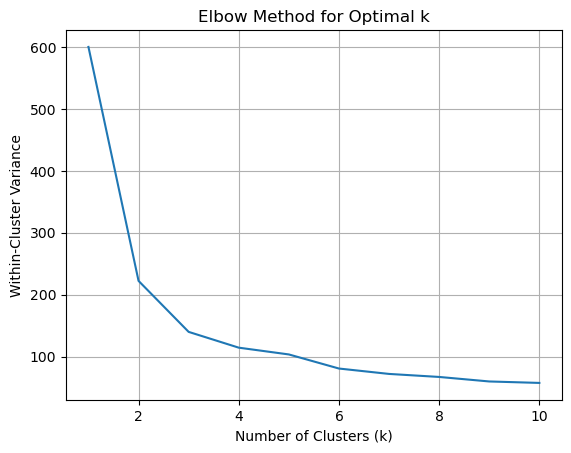

In [60]:
plt.plot(k_values, wcv_values)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Variance")
plt.title("Elbow Method for Optimal k")
plt.grid()
plt.show()

In [61]:
# Optimal number of clusters - 3

## 4. Cluster Visualization

In [63]:
# Reduce the numeric data to 2D or 3D using PCA (Principal Component Analysis)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [64]:
# Visualize the clusters and centroids using a scatter plot

optimal_k = 3
clusters_pca, centroids_pca = kmeans(X_pca, optimal_k)

print("Centroids after PCA \n")
print(centroids_pca)
print("Clusters \n")
print(clusters_pca)

Converged at iteration:  8
Centroids after PCA 

[[ 0.61742366 -0.79845836]
 [-2.22475316  0.28892745]
 [ 1.71731904  0.65486305]]
Clusters 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


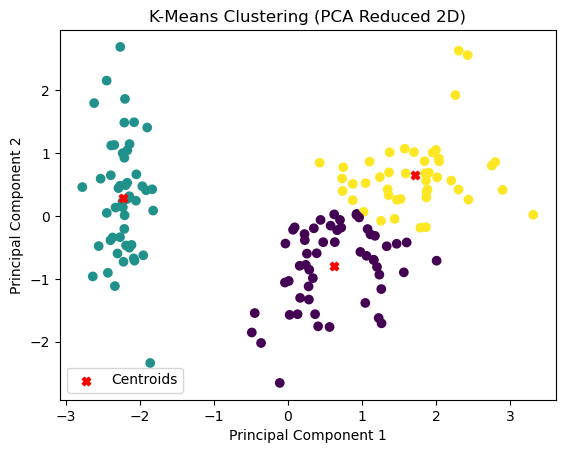

In [65]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', label="Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (PCA Reduced 2D)")
plt.legend()
plt.show()

# 5. Analysis and Implementation Questions

In [67]:
# What are the final centroids of the clusters for the chosen value of k?

print("Final centroids:\n", new_centroids)

Final centroids:
 [[-0.01139555 -0.87600831  0.37707573  0.31115341]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.16743407  0.14530299  1.00302557  1.0300019 ]]


In [68]:
# How does the within-cluster variance change as k increases?

# As k increases, within-cluster variance decreases.
# More clusters mean each cluster is smaller, reducing variance.
# However, after a certain point (elbow), the decrease slows down, making extra clusters unnecessary.

In [69]:
# Does your algorithm perform well for the Iris dataset? Why or why not?

# Yes, it performs well!
# The Elbow Method suggests k = 3, which matches the 3 known species in the Iris dataset.
# The clusters found by K-Means closely align with real species labels.
# PCA visualization shows well-separated clusters.

# Limitations:
# Different initial centroids can lead to different results (sensitivity to initialization)